#  `chord_length_distribution`

Determines the distribution of chord lengths in an image containing chords. It works by applying `chord_counts` metrics and finding histogram data of the chord lengths.

In [1]:
import matplotlib.pyplot as plt
import porespy as ps
import numpy as np
import inspect
inspect.signature(ps.metrics.chord_length_distribution)

<Signature (im, bins=10, log=False, voxel_size=1, normalization='count')>

## `im`
The input image ontaining chords drawn in the void space. This image can be generated by implementing `apply_chords` filter on a binary image. We can use `blobs` generator to generate a test image and draw chords in void space (in x direction by default) using `apply_chords`.

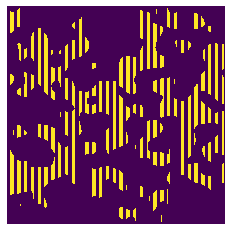

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[500, 500])
im = ps.filters.apply_chords(im)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

Now the test image is ready to be passed to `chord_length_distribution`. The method returns a custom object with information of the distribution of the chord lengths.

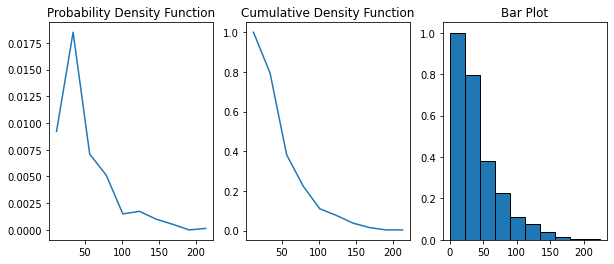

In [3]:
data = ps.metrics.chord_length_distribution(im=im)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.L,data.pdf)
ax[1].plot(data.L,data.cdf)
ax[2].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `bins`

The default number of bins for the histogram is 10. Let's increase the bins to 100:

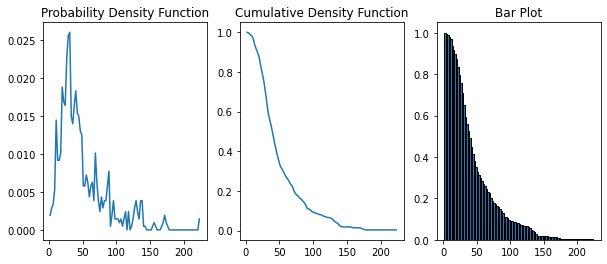

In [4]:
data = ps.metrics.chord_length_distribution(im=im, bins=100)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.L,data.pdf)
ax[1].plot(data.L,data.cdf)
ax[2].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `log`

We can get the histogram of logarithm (base-10) of chord lengths. This can help to plot wide size
distributions or to better visualize the data in the small size region. The resulting histogram binning is then performed on the logged chord length values.

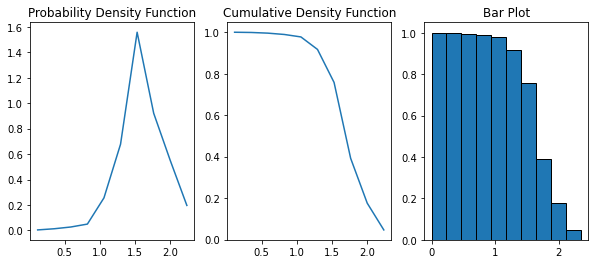

In [5]:
data = ps.metrics.chord_length_distribution(im=im, log=True)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.LogL,data.pdf)
ax[1].plot(data.LogL,data.cdf)
ax[2].bar(data.LogL, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact:

Text(0.5, 1.0, 'PDF scaling after the result')

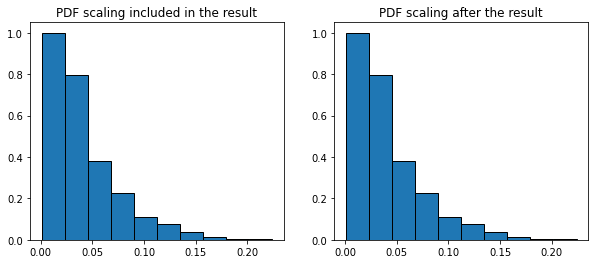

In [6]:
voxel_size=1e-3
data = ps.metrics.chord_length_distribution(im=im, voxel_size=voxel_size)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("PDF scaling included in the result")
data = ps.metrics.chord_length_distribution(im=im)
ax[1].bar(data.L*voxel_size, data.cdf, data.bin_widths*voxel_size, edgecolor='k')
ax[1].set_title("PDF scaling after the result")

## `normalization`

Indicates how to normalize the bin heights. By default the method counts the number of chords in each bin in the normal sense of a histogram. By choosing `length` option, the method multiplies the number of chords in each bin by the chord length.  The normalization scheme accounts for the fact that long chords are less frequent than shorert chords, thus giving a more balanced distribution.

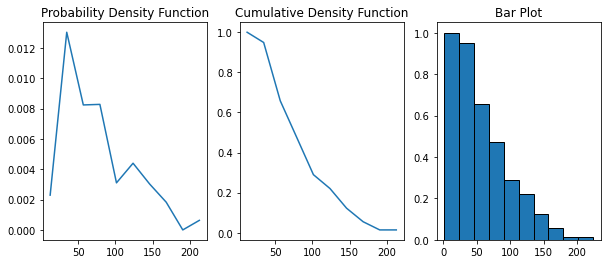

In [7]:
data = ps.metrics.chord_length_distribution(im=im, normalization='length')
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.L,data.pdf)
ax[1].plot(data.L,data.cdf)
ax[2].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');